### Script for analyzing and plotting contribution guidelines
In this script, we summarize the options offered by github repositories for collaborating on data standards.

First, import libraries

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Read in data for analysis

In [2]:
contribution_pages = pd.read_csv('data/contribution_guidelines.csv', header=0)

Inspect data

In [3]:
contribution_pages.head()

,organization_or_project_name,mention_contributing,outline_for_contributing_workflow,instructions_for_branching,github_tutorial,issue_template,code_of_conduct,notes
0,Darwin Core,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1,EML,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,Ecological Trait Data Standard,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,MIxS,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,IGSN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Delete the notes column since this is not part of our analysis.

In [4]:
del contribution_pages['notes']

Double check to make sure notes column was deleted

In [5]:
contribution_pages.head()

,organization_or_project_name,mention_contributing,outline_for_contributing_workflow,instructions_for_branching,github_tutorial,issue_template,code_of_conduct
0,Darwin Core,1.0,NaN,NaN,NaN,1.0,NaN
1,EML,1.0,1.0,1.0,NaN,NaN,NaN
2,Ecological Trait Data Standard,1.0,NaN,NaN,NaN,1.0,NaN
3,MIxS,1.0,NaN,NaN,NaN,1.0,NaN
4,IGSN,1.0,NaN,NaN,NaN,NaN,NaN


Calculate sum for each of the different contribution elements

In [6]:
contribution_pages_totals = contribution_pages.sum()
print(contribution_pages_totals)

organization_or_project_name         Darwin CoreEMLEcological Trait Data StandardMI...
mention_contributing                                                                18
outline_for_contributing_workflow                                                   10
instructions_for_branching                                                           8
github_tutorial                                                                      3
issue_template                                                                       8
code_of_conduct                                                                      3
dtype: object


Drop the header since we rename in next step

In [7]:
contribution_new_labels = contribution_pages_totals.drop("organization_or_project_name")
contribution_new_labels.head()

mention_contributing                 18
outline_for_contributing_workflow    10
instructions_for_branching            8
github_tutorial                       3
issue_template                        8
dtype: object

Rename header and conver to a dataframe

In [8]:
contributing_pages_df = pd.DataFrame({'Contributing_elements':contribution_new_labels.index, 'count':contribution_new_labels.values})
contributing_pages_df

,Contributing_elements,count
0,mention_contributing,18
1,outline_for_contributing_workflow,10
2,instructions_for_branching,8
3,github_tutorial,3
4,issue_template,8
5,code_of_conduct,3


Create a new column showing percentages of each contributing element

In [9]:
contributing_pages_df['percent'] = (contributing_pages_df['count'] / len(contribution_pages.index)) * 100
print(contributing_pages_df)

               Contributing_elements count percent
0               mention_contributing    18   56.25
1  outline_for_contributing_workflow    10   31.25
2         instructions_for_branching     8      25
3                    github_tutorial     3   9.375
4                     issue_template     8      25
5                    code_of_conduct     3   9.375


Prepare for plotting by soring the percents from max to min

In [10]:
result = contributing_pages_df.sort_values('percent', ascending=False)
print(result)

               Contributing_elements count percent
0               mention_contributing    18   56.25
1  outline_for_contributing_workflow    10   31.25
2         instructions_for_branching     8      25
4                     issue_template     8      25
3                    github_tutorial     3   9.375
5                    code_of_conduct     3   9.375


Make bar plot using seaborn package

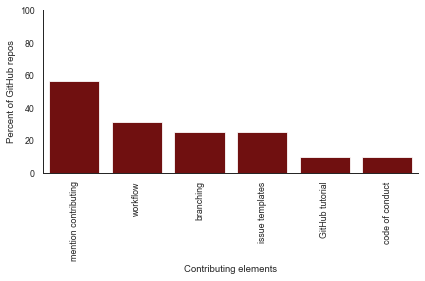

In [11]:
sns.set_style("white")
sns.set_context("paper")
contributing_barplot = sns.barplot(x="Contributing_elements", 
                                y = "percent", 
                                data = contributing_pages_df, 
                                color="maroon",
                               order = result['Contributing_elements'])
contributing_barplot.set(xlabel = "Contributing elements", 
                      ylabel = "Percent of GitHub repos")
contributing_barplot.set_xticklabels(contributing_barplot.get_xticklabels(), 
                                  rotation=90)
contributing_barplot.set_xticklabels(['mention contributing','workflow','branching','issue templates','GitHub tutorial','code of conduct'])
sns.despine(top=True)
plt.ylim(0,100)
plt.tight_layout(h_pad=2)

### Analysis of repositories that ask for issues and/or PRs

Now, import issues vs. pull request data. Could potentially use this data to make pie chart

In [15]:
issue_and_pr = pd.read_csv('data/issues_vs_prs.csv', header=0)

In [16]:
issue_and_pr_totals = issue_and_pr.sum()
print(issue_and_pr_totals)

organization_or_project_name     Darwin CoreEMLEcological Trait Data StandardMI...
only_allows_issues                                                               9
both_pull_requests_and_issues                                                   13
unclear_how_to_contribute                                                        9
dtype: object


In [16]:
issues_new_labels = issue_and_pr_totals.drop("organization_or_project_name")
issues_new_labels.head()

only_allows_issues                9
both_pull_requests_and_issues    13
unclear_how_to_contribute         9
dtype: object

In [17]:
issues_df = pd.DataFrame({'ways_to_submit_issues':issues_new_labels.index, 'count':issues_new_labels.values})
issues_df

,ways_to_submit_issues,count
0,only_allows_issues,9
1,both_pull_requests_and_issues,13
2,unclear_how_to_contribute,9


In [29]:
issues_df['percent'] = (issues_df['count'] / len(issue_and_pr.index)) * 100
print(issues_df)

           ways_to_submit_issues count  percent
0             only_allows_issues     9  29.0323
1  both_pull_requests_and_issues    13  41.9355
2      unclear_how_to_contribute     9  29.0323


In [30]:
result_issues = issues_df.sort_values('percent', ascending=False)
print(result_issues)

           ways_to_submit_issues count  percent
1  both_pull_requests_and_issues    13  41.9355
0             only_allows_issues     9  29.0323
2      unclear_how_to_contribute     9  29.0323


Not planning to make figure for this since, easy to just give these #s in results